In [51]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [ ]:
# Peak detection and gaussian on the histogram of the image heights

# H
# |          =               
# |          = =            
# |  =     = = =              
# |  =     = = = =             
# |= =   = = = = =      =        
# |= = = = = = = = =  = = =         
# \ - - - - - - - - - - - - X



In [ ]:
# Identify the background
#   Generate mask
#   Estimate polynomial background
# Determine 1-D background offsets from the raw data within the mask
# Subtract the 1-D offsets from the raw data followed by a single masked background flattening.

shape: (1024, 1024)


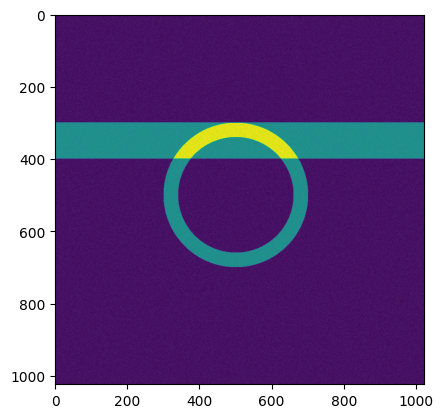

In [70]:
# file_name = 'images/random_scanlines_0.png'
# im = Image.open(file_name)
# im_array = np.array(im, dtype=float)
# im_array = im_array[:, :, 0]
# im_array = np.array([[1, 1, 1, 1], [5, 5, 5, 5], [1, 1, 1, 1], [1, 1, 1, 1]], dtype=np.float64)

def add_ring(image: np.ndarray, outer_size: int = 200, inner_size: int = 100, centre: tuple = (0, 0)):
    cx = centre[0]
    cy = centre[1]
    for i in range(-outer_size, outer_size):
        for j in range(-outer_size, outer_size):
            if ((i)**2 + (j)**2) < outer_size**2 and i**2 + j**2 > inner_size**2:             
                image[i+cx, j+cy] += 5
    return image

im_array = np.ones((1024, 1024))
im_array[300:400, :] += 5
for j in range(im_array.shape[1]):
    for i in range(im_array.shape[0]):
        im_array[j, i] += (np.random.random() - 0.5)

print(f'shape: {im_array.shape}')
im_array = add_ring(im_array, outer_size=200, inner_size=160, centre=(500, 500))
plt.imshow(im_array)
plt.show()




# Median
def median_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        # Get the median of the row
        m = np.median(image[j, :])
        # print(m)
        image[j, :] -= m
    return image

# Median differences
def median_differences_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        if j > 0:
            median_height_diff_above = np.median(image[j, :] - image[j-1, :])
            # print(f'median difference in height: {median_height_diff_above}')
            image[j, :] -= median_height_diff_above
    return image

# print(im_array)
# im_array = median_differences_flattening(im_array)
# im_array = median_flattening(im_array)
# im_array = median_differences_flattening(im_array)

# plt.imshow(im_array)
# print(im_array)